### Simple Allocations
- Imputation by means or median, if there are many missing data this can change the deviation of the data, which is why it is not advisable
- Imputation by regression (the value is changed to a value predicted by a regression model combining the information from the missing columns or variables with columns where the data is complete)
- Hot-Deck KNN imputation (key nearest neigborg replaces missing data with neighboring data) is used when correlation between the data cannot be guaranteed

### Multiple Imputations

- MICE: Multiple Imputation by Chain Equations (variables must be linearly related)

# Data exploration

* Be clear about the question we want to answer;
* Have a general idea of ​​our dataset;
* Define the types of data we have;
* Choose the type of descriptive statistics
* Visualize the data;
* Analyze the possible interactions between the variables of the dataset; and finally
* Draw some conclusions from all this analysis.

### Data types

The following data is obtained from the file "clean_df.csv"

- initial_sal_ Initial salary offered 
- final_sal Final salary offered
- mean_salary Mean salary obtained from the first two columns
- period Period of time year, month, week , hour that the payment of the salary is stablished
- period_cond The contions offered acroding to the job
- job The position that the persons is taking
- job_type The type of job full time, part time....
- city City where the person has to work
- state The State of the city
- organization_ Name of the organization
- org_desc Description of the organization
- sector_ Sector that the organization belongs to
- sector_level Level of the position like manager or support
- benefits Benefits offered by the organization

In [135]:
import pandas as pd
import numpy as np

In [136]:
df = pd.read_csv('clean_df.csv',encoding="Latin1")
#df = pd.read_csv('clean_df.csv',encoding="utf-8")


In [137]:
df = df.set_index('uniq_id')
df.head(5)
# Before doing anything we are going to set the column 'uniq_id' as index, this way we are noi going to have integrity issues when makin join o merge

,initial_sal_,final_sal,mean_salary,period,period_cond,job,job_type,city,state,organization_,org_desc,sector_,sector_level,benefits
uniq_id,,,,,,,,,,,,,,
58435fcab804439efdcaa7ecca0fd783,0.0,0.0,0.0,NaN,NaN,engineer,full time,dixon,ca,Altec,Industries,Experienced,(Non-Manager),NaN
64d0272dc8496abfd9523a8df63c184c,0.0,0.0,0.0,NaN,NaN,shift supervisor,full time,camphill,pa,Retail,NaN,Project/Program,Management,NaN
1e2637cb5f7a2c4615a99a26c0566c66,0.0,0.0,0.0,NaN,NaN,construction pm,full time,charlottesville,va,Computer,IT Services,Experienced,(Non-Manager),NaN
a6a2b5e825b8ce1c3b517adb2497c5ed,0.0,0.0,0.0,NaN,NaN,housekeeper,part time,austin,tx 78746,Hotels,Lodging Personal Household Services,Customer,Support/Client Care,NaN
2f8bdf60db4d85627ab8f040e67aa78d,0.0,0.0,0.0,NaN,NaN,aflac insurance sales agent insurance sales ag...,full time,berryville,va 22611,Insurance,NaN,Customer,Support/Client Care,NaN


In [138]:
df.shape

(11847, 14)

Data types can be:
- numeric:
    * discrete (Take only integer values ​​such as age)
    * continuous (They can take value within an interval such as salary)
- Categorical
    * binary (indicate one of two possible categories 1 or 0 pass the matter or not)
    * nominal (they label the data but cannot be ordered or measured as gender, man, woman or .......)
    * ordinals (Correspond to the order in which the data comes)

In [139]:
df.dtypes
# numeric Variables  continuos: initial_sal_ , final_sal   ,mean_salary
# Period, jobtype are nominales can be both sorted or measured
# Variables categoricas El resto de las varibales que puedes encontral en la lista que arroja 'dtypes'

initial_sal_     float64
final_sal        float64
mean_salary      float64
period            object
period_cond       object
job               object
job_type          object
city              object
state             object
organization_     object
org_desc          object
sector_           object
sector_level      object
benefits          object
dtype: object

### Selection of data to evaluate


In [140]:
df_data = df.apply(lambda x: x.astype(str).str.lower())# convert entire dataset to lower case
df_data = df[df['mean_salary'] !=0] 
df_data_cero = df[df['mean_salary'] ==0] 
df_data_cero.head(5)

# We first chose the data with the mean salary diferent to cero, it means that exist an initial salary and an final salary an data in categorical variables
# we hace 1665 rows and 15 columns

,initial_sal_,final_sal,mean_salary,period,period_cond,job,job_type,city,state,organization_,org_desc,sector_,sector_level,benefits
uniq_id,,,,,,,,,,,,,,
58435fcab804439efdcaa7ecca0fd783,0.0,0.0,0.0,NaN,NaN,engineer,full time,dixon,ca,Altec,Industries,Experienced,(Non-Manager),NaN
64d0272dc8496abfd9523a8df63c184c,0.0,0.0,0.0,NaN,NaN,shift supervisor,full time,camphill,pa,Retail,NaN,Project/Program,Management,NaN
1e2637cb5f7a2c4615a99a26c0566c66,0.0,0.0,0.0,NaN,NaN,construction pm,full time,charlottesville,va,Computer,IT Services,Experienced,(Non-Manager),NaN
a6a2b5e825b8ce1c3b517adb2497c5ed,0.0,0.0,0.0,NaN,NaN,housekeeper,part time,austin,tx 78746,Hotels,Lodging Personal Household Services,Customer,Support/Client Care,NaN
2f8bdf60db4d85627ab8f040e67aa78d,0.0,0.0,0.0,NaN,NaN,aflac insurance sales agent insurance sales ag...,full time,berryville,va 22611,Insurance,NaN,Customer,Support/Client Care,NaN


#### Find median
In order ot find the median we have to create clusters of the variables "type_job" an the "period" because is not the same the salary of a full time job, or hourly or weekly or per diem

In [141]:
df_data.isnull().sum()
# As we can see there are 134 nan values for period and 5 for job_type


initial_sal_        0
final_sal           0
mean_salary         0
period            134
period_cond      1370
job                10
job_type            5
city                0
state              94
organization_       0
org_desc          163
sector_             0
sector_level      303
benefits         1412
dtype: int64

In [142]:
df_data = df_data.dropna(subset=['period', 'job_type'])

In [143]:
df_data.shape

(1526, 14)

In [144]:
df_data.isnull().sum()

initial_sal_        0
final_sal           0
mean_salary         0
period              0
period_cond      1232
job                 8
job_type            0
city                0
state              93
organization_       0
org_desc          151
sector_             0
sector_level      303
benefits         1273
dtype: int64

In [145]:
df_data['period'].unique()
# We identified the periods of tiem that will be clusteres

array(['hour', 'year', 'week', 'mont'], dtype=object)

In [146]:
df_data['job_type'].unique()
# We identified the job_type that will be clusteres

array(['full time', 'full time temporary', 'part time', 'temporary',
       'per diem', 'part time temporary'], dtype=object)

In [147]:
# Lets segregate the numeric data
num_data_cluster = df_data[['initial_sal_','final_sal','mean_salary','period','job_type']]
num_data_cluster.head(5)

# I think it would be easier to concatenate period and job_type to simplify the clusters

,initial_sal_,final_sal,mean_salary,period,job_type
uniq_id,,,,,
b43c077756d5a326c4854e1399fd2464,900.0,1300.0,1100.0,hour,full time
d8491fcefe14d1398de419984dccf427,8000000.0,9500000.0,8750000.0,year,full time
779bb4c9bf038b7fb775134736d36fd4,7000000.0,10000000.0,8500000.0,year,full time
ceb44cca7cd280adcb0c84c20f3c6c21,6800000.0,7200000.0,7000000.0,year,full time temporary
eea9b50afc4fece9f9d6ff0dbf659784,5800000.0,6500000.0,6150000.0,year,full time


In [148]:
num_data_cluster_ =num_data_cluster.copy()
num_data_cluster_.loc[:,'period_job'] = ""

In [149]:
# Lets create a new variable that allow to join 'period' and ' job_thype' to manage a mora acertive exploration
num_data_cluster_['period_job'] =  num_data_cluster_['period']+' '+num_data_cluster_['job_type']
num_data_cluster_ = num_data_cluster_.drop(['period','job_type'], axis=1)
num_data_cluster_['period_job'] = num_data_cluster_['period_job'].replace(' ', '_', regex=True)
num_data_cluster_

,initial_sal_,final_sal,mean_salary,period_job
uniq_id,,,,
b43c077756d5a326c4854e1399fd2464,900.0,1300.0,1100.0,hour_full_time
d8491fcefe14d1398de419984dccf427,8000000.0,9500000.0,8750000.0,year_full_time
779bb4c9bf038b7fb775134736d36fd4,7000000.0,10000000.0,8500000.0,year_full_time
ceb44cca7cd280adcb0c84c20f3c6c21,6800000.0,7200000.0,7000000.0,year_full_time_temporary
eea9b50afc4fece9f9d6ff0dbf659784,5800000.0,6500000.0,6150000.0,year_full_time
...,...,...,...,...
4e2b0a3e9fe5f8721f6ab4692823d9a9,25000.0,0.0,25000.0,week_full_time
ac3c743eb7612d90bfe80a3a30d3d8be,5500000.0,6000000.0,5750000.0,year_full_time
8e9f8638556bc1fd671bb99f4f01ac4d,7500000.0,8500000.0,8000000.0,year_full_time


#### DESCRIPTIVE STATISTICS!

For continuous and discrete data we can plot a histogram that is obtained:
* Organizing data into groups
* Perform the data count in each group
* Check if the information is normal (bell-shaped) or skewed (inclined to one side)
* Make boxplots to check for biased data (Both for continuous and discrete data)



In [150]:
list_period_job = num_data_cluster_['period_job'].unique()
list_period_job
#No we do have a list of the variables to create the clusters to examine data

array(['hour_full_time', 'year_full_time', 'year_full_time_temporary',
       'hour_part_time', 'hour_full_time_temporary', 'week_full_time',
       'hour_temporary', 'hour_per_diem', 'mont_full_time',
       'hour_part_time_temporary', 'mont_part_time', 'year_part_time'],
      dtype=object)

In [151]:
d={}
for  i  in list_period_job:
    d[i]= num_data_cluster_[num_data_cluster_['period_job'].isin([i])]
   
print(d)

# Lets use a dictionary to separate each cluster that later will be a dataframe with its own period_job
# There are diferent ways to do this like create a dateframe with a conditional of the value of the variable "period_job" but lets have fun this way

{'hour_full_time':                                   initial_sal_  final_sal  mean_salary  \
uniq_id                                                                  
b43c077756d5a326c4854e1399fd2464         900.0     1300.0       1100.0   
3c2f7c555173e04db07a96b23c1be974        1375.0     1675.0       1525.0   
f884de2958f94e4ad417aefcacd350c7        1700.0     2200.0       1950.0   
776bd5c4c2412714ed9f1ac098470aac        1500.0     1900.0       1700.0   
64a597e5dd17740aadf4b0e8047b51a5        1500.0     2100.0       1800.0   
...                                        ...        ...          ...   
5310eafc4a142affdd10ab50de2c1cca        1500.0     1800.0       1650.0   
b5838e6822ee1ffd9174d41ba9ae7b9b        1400.0     1600.0       1500.0   
4a65f0199487728cc762abd524237360        1175.0     1275.0       1225.0   
292810c8b37005b3b49f84c790110594        2325.0     2521.0       2423.0   
40161cf61c283af9dc2b0a62947a5f1b        2500.0     2800.0       2650.0   

                  

In [152]:
def create_Dataframes(d, dict_dataframes):
    return d.get(dict_dataframes)
    

hour_full_time              =  create_Dataframes(d,list_period_job[0])
year_full_time              =  create_Dataframes(d,list_period_job[1])
year_full_time_temporary    =  create_Dataframes(d,list_period_job[2])
hour_part_time              =  create_Dataframes(d,list_period_job[3])
hour_full_time_temporary    =  create_Dataframes(d,list_period_job[4])
week_full_time              =  create_Dataframes(d,list_period_job[5])
hour_temporary              =  create_Dataframes(d,list_period_job[6])
hour_per_diem               =  create_Dataframes(d,list_period_job[7])
mont_full_time              =  create_Dataframes(d,list_period_job[8])
hour_part_time_temporary    =  create_Dataframes(d,list_period_job[9])
mont_part_time              =  create_Dataframes(d,list_period_job[10])
year_part_time              =  create_Dataframes(d,list_period_job[11])

# Finaly in this fucntion we extract each "period_job" so we can create some visualizations for each one


In [153]:
import matplotlib.pyplot as plt
import seaborn as sns

### box-plot for the skewed feature

#### In the box plots we can select de media with 'meanline'

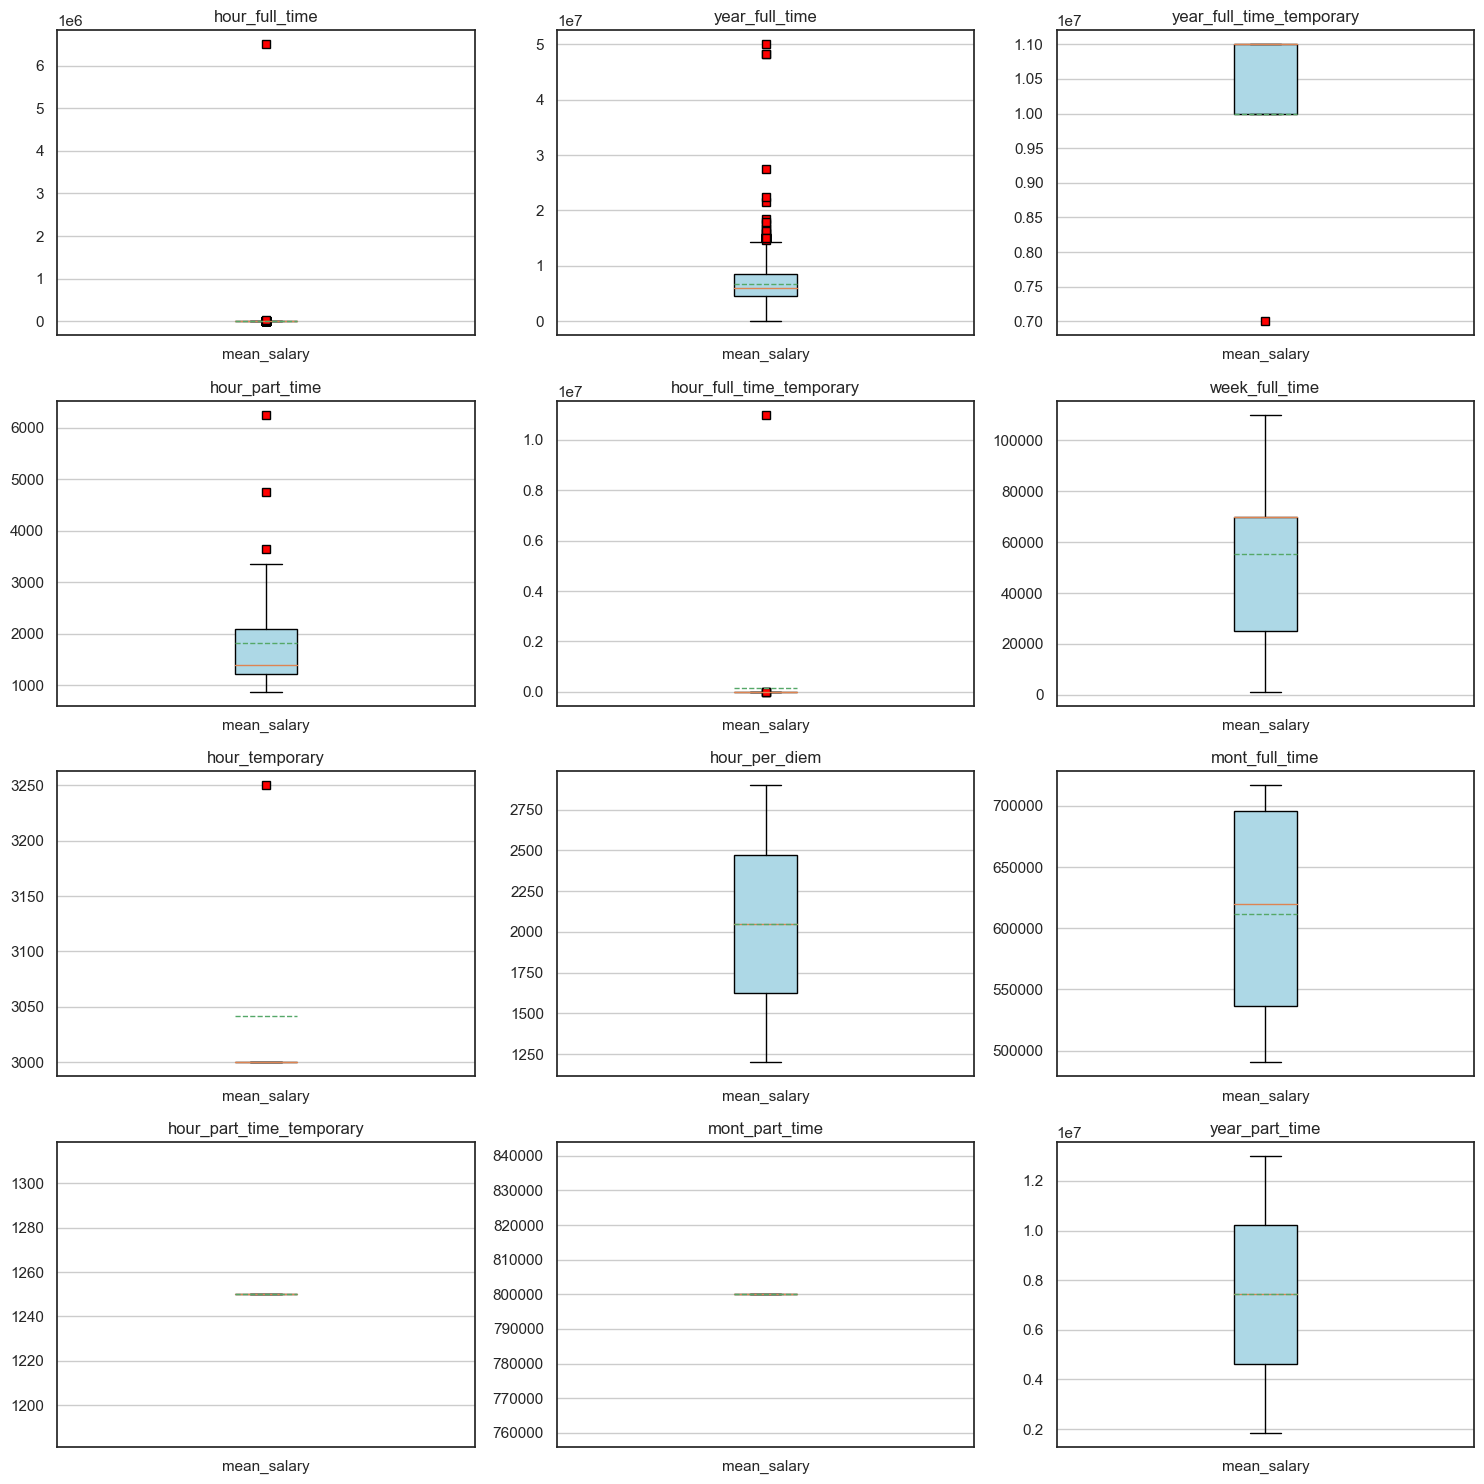

In [154]:
plt.rcParams["figure.figsize"] = [15,15]
plt.rcParams["figure.autolayout"] = True

fig, axs = plt.subplots(4,3)

labels=['mean_salary']
boxprops = dict(facecolor = "lightblue")
flierprops = dict(marker = "s", markerfacecolor = "red")

axs[0, 0].boxplot(hour_full_time[labels], flierprops = flierprops, showmeans = True, meanline = True , patch_artist = True,boxprops = boxprops, labels=labels)
axs[0, 0].set_title('hour_full_time')
axs[0, 0].yaxis.grid(True)

axs[0, 1].boxplot(year_full_time[labels], flierprops = flierprops,showmeans = True, meanline = True ,patch_artist = True, boxprops = boxprops , labels=labels)
axs[0, 1].set_title('year_full_time')
axs[0, 1].yaxis.grid(True)

axs[0, 2].boxplot(year_full_time_temporary[labels], flierprops = flierprops, showmeans = True, meanline = True , patch_artist = True,boxprops = boxprops, labels=labels)
axs[0, 2].set_title('year_full_time_temporary')
axs[0, 2].yaxis.grid(True)

axs[1, 0].boxplot(hour_part_time[labels], flierprops = flierprops,showmeans = True, meanline = True ,patch_artist = True, boxprops = boxprops , labels=labels)
axs[1, 0].set_title('hour_part_time')
axs[1, 0].yaxis.grid(True)

axs[1, 1].boxplot(hour_full_time_temporary[labels], flierprops = flierprops, showmeans = True, meanline = True , patch_artist = True,boxprops = boxprops, labels=labels)
axs[1, 1].set_title('hour_full_time_temporary')
axs[1, 1].yaxis.grid(True)

axs[1, 2].boxplot(week_full_time[labels], flierprops = flierprops,showmeans = True, meanline = True ,patch_artist = True, boxprops = boxprops , labels=labels)
axs[1, 2].set_title('week_full_time')
axs[1, 2].yaxis.grid(True)

axs[2, 0].boxplot(hour_temporary[labels], flierprops = flierprops, showmeans = True, meanline = True , patch_artist = True,boxprops = boxprops, labels=labels)
axs[2, 0].set_title('hour_temporary')
axs[2, 0].yaxis.grid(True)

axs[2, 1].boxplot(hour_per_diem[labels], flierprops = flierprops,showmeans = True, meanline = True ,patch_artist = True, boxprops = boxprops , labels=labels)
axs[2, 1].set_title('hour_per_diem')
axs[2, 1].yaxis.grid(True)

axs[2, 2].boxplot(mont_full_time[labels], flierprops = flierprops, showmeans = True, meanline = True , patch_artist = True,boxprops = boxprops, labels=labels)
axs[2, 2].set_title('mont_full_time')
axs[2, 2].yaxis.grid(True)

axs[3, 0].boxplot(hour_part_time_temporary[labels], flierprops = flierprops,showmeans = True, meanline = True ,patch_artist = True, boxprops = boxprops , labels=labels)
axs[3, 0].set_title('hour_part_time_temporary')
axs[3, 0].yaxis.grid(True)

axs[3, 1].boxplot(mont_part_time[labels], flierprops = flierprops, showmeans = True, meanline = True , patch_artist = True,boxprops = boxprops, labels=labels)
axs[3, 1].set_title('mont_part_time')
axs[3, 1].yaxis.grid(True)

axs[3, 2].boxplot(year_part_time[labels], flierprops = flierprops,showmeans = True, meanline = True ,patch_artist = True, boxprops = boxprops , labels=labels)
axs[3, 2].set_title('year_part_time')
axs[3, 2].yaxis.grid(True)


plt.show()

# What we can see hear is that the outliers are mostly in one of the sides of the boxplot , in seems that in this case above the maximun value of the salariees
# But not for every cluster junt for some of them, those which have no aoutliers will not be processed

#hour_full_time (skew)
#year_full_time (skew)
#year_full_time_temporary (skew) (under minimun)
#hour_part_time (skew)
#hour_full_time_temporary (skew)



## Find standar dev, intecuartils and  Eliminate outliers
#### As we can see there are some clusters that have outliers too far from the media and this kind of behaviour affects our capacity to create a real measurement or define a tendency, thats why we have to elimitate them

### IQR Based Filtering
####Used when our data distribution is skewed.

For Skewed Distributions
Use Inter-Quartile Range (IQR) proximity rule.
The data points that fall below Q1 – 1.5 IQR or above the third quartile Q3 + 1.5 IQR are outliers, where Q1 and Q3 are the 25th and 75th percentile of the dataset, respectively. IQR represents the inter-quartile range and is given by Q3 – Q1.

This clusters are skewed mostly above maximun so lets filter them
- hour_full_time
- year_full_time
- year_full_time_temporary (under minimun)
- hour_part_time
- hour_full_time_temporary

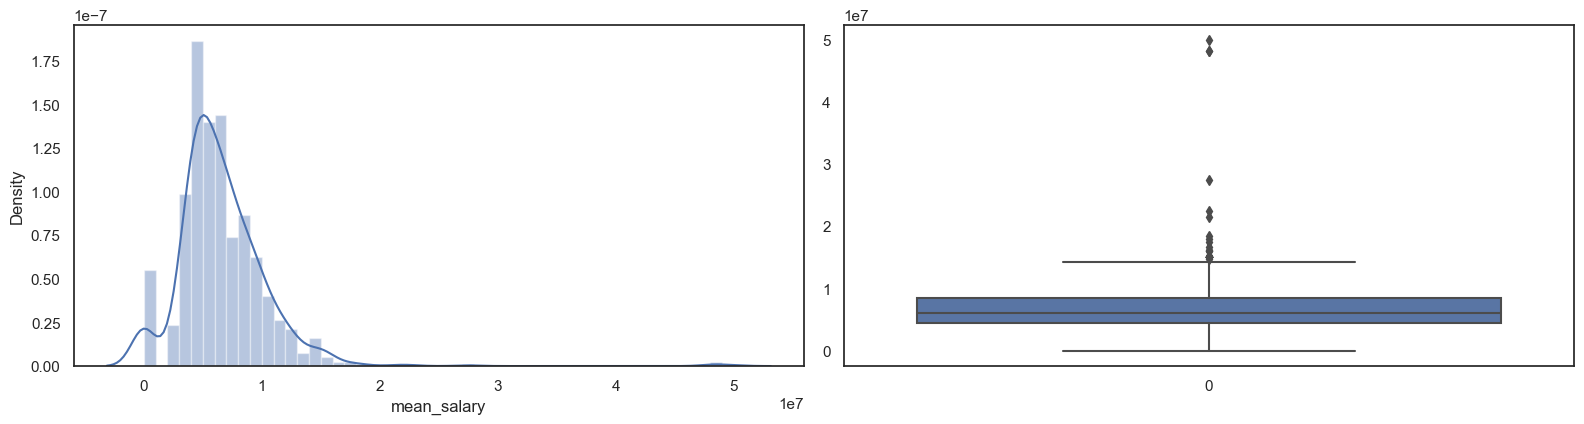

In [155]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(16,8))

plt.subplot(2,2,1)
sns.distplot(year_full_time['mean_salary'] )
plt.subplot(2,2,2)
sns.boxplot(year_full_time['mean_salary'] )
plt.show()

# This is an example of how is the data skewed and the outliers of a dataset

### # Finding the percentils

In [156]:
def percentil(mean_salary):
    return mean_salary.quantile(0.75), mean_salary.quantile(0.25)
   
hour_full_time_75_25            = percentil(hour_full_time['mean_salary'])
year_full_time_75_25            = percentil(year_full_time['mean_salary'])
year_full_time_temporary_75_25  = percentil(year_full_time_temporary['mean_salary'])
hour_part_time_75_25            = percentil(hour_part_time['mean_salary'])
hour_full_time_temporary_75_25  = percentil(hour_full_time_temporary['mean_salary'])


print('percentils 75 y 25') 
print ('hour_full_time: ', hour_full_time_75_25 ,
       '\n','year_full_time:', year_full_time_75_25,
       '\n','year_full_time_temporary:', year_full_time_temporary_75_25,
       '\n','hour_part_time: ', hour_part_time_75_25,
       '\n','hour_full_time: ',hour_full_time_temporary_75_25  )
       

percentils 75 y 25
hour_full_time:  (2229.0, 1350.0) 
 year_full_time: (8500000.0, 4500000.0) 
 year_full_time_temporary: (11000000.0, 10000000.0) 
 hour_part_time:  (2100.0, 1212.5) 
 hour_full_time:  (4000.0, 1700.0)


### # Finding the IQR (nter-Quartile Range)

In [157]:
def i_q_r(percentils):
    return percentils[0]-percentils[1]

iqr_hour_full_time           = i_q_r(hour_full_time_75_25)
iqr_year_full_time           = i_q_r(year_full_time_75_25)
iqr_year_full_time_temporary = i_q_r(year_full_time_temporary_75_25)
iqr_hour_part_time           = i_q_r(hour_part_time_75_25)
iqr_hour_full_time_temporary = i_q_r(hour_full_time_temporary_75_25)

print( 'iqr_hour_full_time  :',iqr_hour_full_time,
      '\n', 'iqr_year_full_time  :',iqr_year_full_time,
      '\n','iqr_year_full_time_temporary  :',iqr_year_full_time_temporary,
      '\n', 'iqr_hour_part_time  :',iqr_hour_part_time,
      '\n','iqr_hour_full_time_temporary  :',iqr_hour_full_time_temporary)
      

iqr_hour_full_time  : 879.0 
 iqr_year_full_time  : 4000000.0 
 iqr_year_full_time_temporary  : 1000000.0 
 iqr_hour_part_time  : 887.5 
 iqr_hour_full_time_temporary  : 2300.0


### Finding the limits

In [158]:
def limits(percentil, iqr):
    return percentil[0] + 1.5*iqr, percentil[1] - 1.5*iqr

hour_full_time_up_low           = limits(hour_full_time_75_25,iqr_hour_full_time)
year_full_time_up_low           = limits(year_full_time_75_25,iqr_year_full_time)
year_full_time_temporary_up_low = limits(year_full_time_temporary_75_25,iqr_year_full_time_temporary)
hour_part_time_up_low           = limits(hour_part_time_75_25,iqr_hour_part_time)
hour_full_time_temporary_up_low = limits(hour_full_time_temporary_75_25,iqr_hour_full_time_temporary)

print( 'hour_full_time_up_low  :',hour_full_time_up_low,
      '\n', 'year_full_time_up_low  :',year_full_time_up_low,
      '\n','year_full_time_temporary_up_low  :',year_full_time_temporary_up_low,
      '\n', 'hour_part_time_up_low  :',hour_part_time_up_low,
      '\n','hour_full_time_temporary_up_low  :',hour_full_time_temporary_up_low)


hour_full_time_up_low  : (3547.5, 31.5) 
 year_full_time_up_low  : (14500000.0, -1500000.0) 
 year_full_time_temporary_up_low  : (12500000.0, 8500000.0) 
 hour_part_time_up_low  : (3431.25, -118.75) 
 hour_full_time_temporary_up_low  : (7450.0, -1750.0)


### # Trimming outliers

In [159]:
def Trimming_outliers_up(dataset , column ,  up_low):
    return dataset[dataset[column] < up_low[0]]
    
new_hour_full_time_up               = Trimming_outliers_up(hour_full_time, 'mean_salary', hour_full_time_up_low)
new_year_full_time_up               = Trimming_outliers_up(year_full_time, 'mean_salary' , year_full_time_up_low)
new_year_full_time_temporary_up     = Trimming_outliers_up(year_full_time_temporary, 'mean_salary' ,year_full_time_temporary_up_low)
new_hour_part_time_up               = Trimming_outliers_up(hour_part_time, 'mean_salary' ,hour_part_time_up_low)  
new_hour_full_time_temporary_up     = Trimming_outliers_up(hour_full_time_temporary, 'mean_salary', hour_full_time_temporary_up_low)  


In [160]:
def Trimming_outliers_low(dataset , column ,  up_low):
    return dataset[dataset[column] > up_low[1]]

new_hour_full_time_low               = Trimming_outliers_low(new_hour_full_time_up, 'mean_salary', hour_full_time_up_low)
new_year_full_time_low               = Trimming_outliers_low(new_year_full_time_up, 'mean_salary' , year_full_time_up_low)
new_year_full_time_temporary_low     = Trimming_outliers_low(new_year_full_time_temporary_up, 'mean_salary' ,year_full_time_temporary_up_low)
new_hour_part_time_low               = Trimming_outliers_low(new_hour_part_time_up, 'mean_salary' ,hour_part_time_up_low)  
new_hour_full_time_temporary_low     = Trimming_outliers_low(new_hour_full_time_temporary_up, 'mean_salary', hour_full_time_temporary_up_low) 



### Compare the plots after trimming

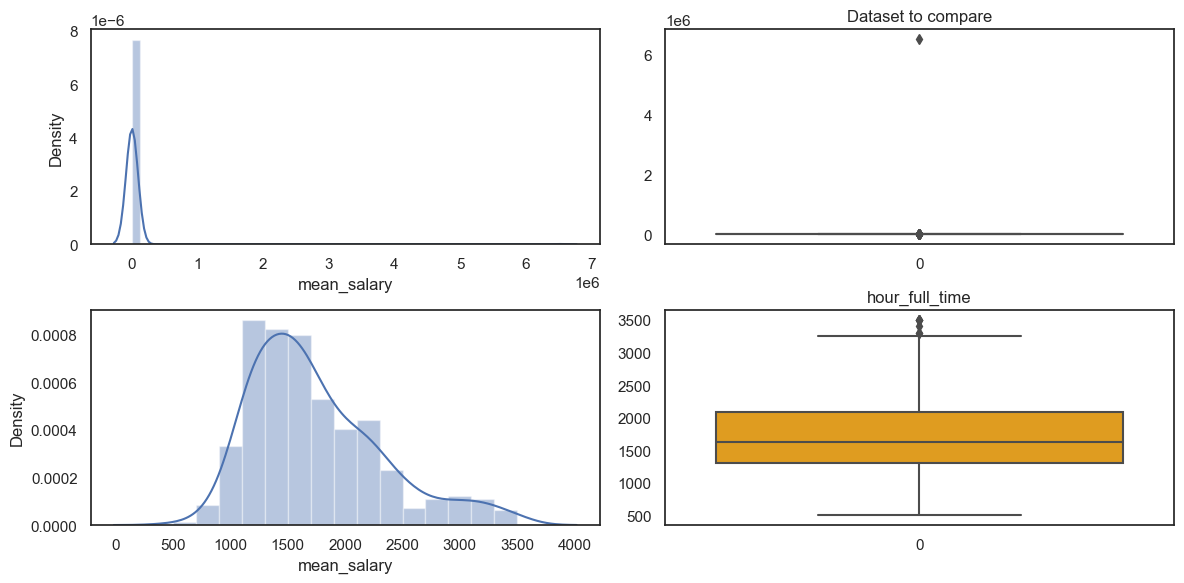

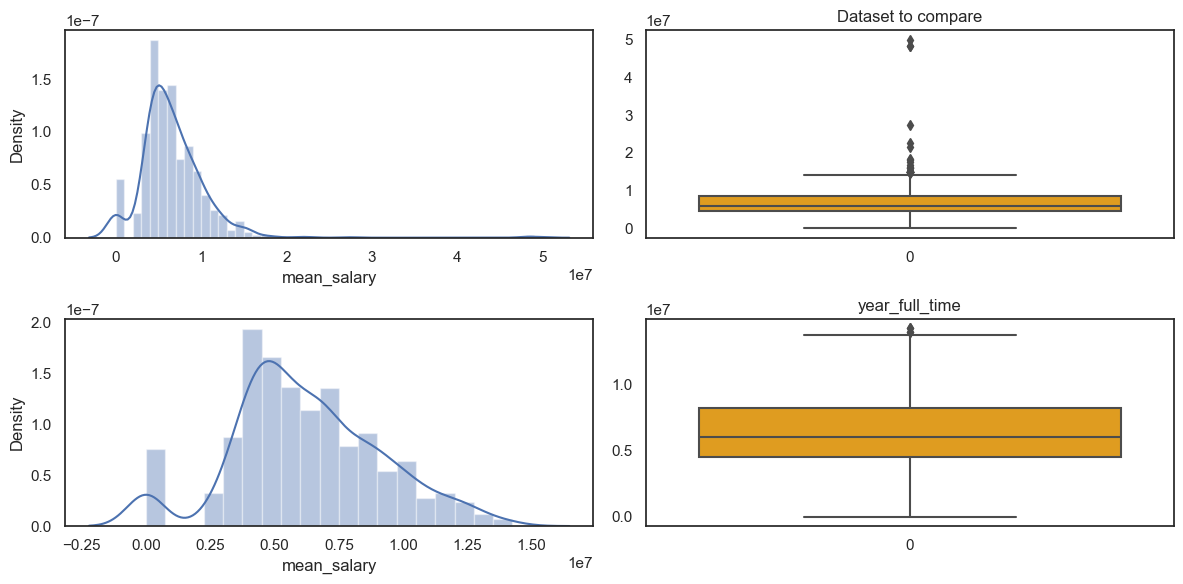

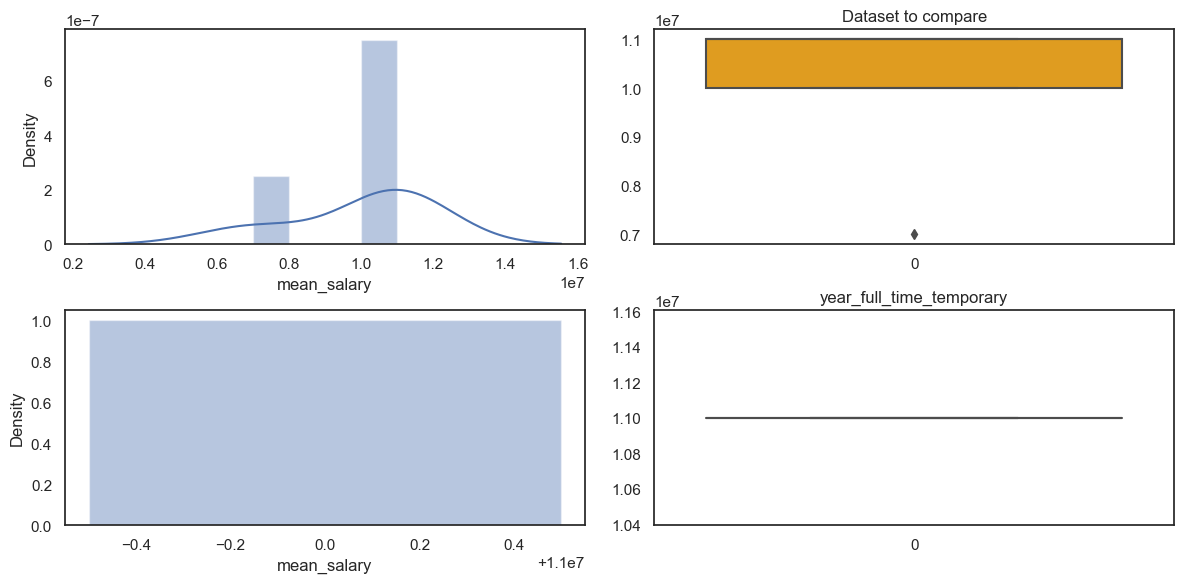

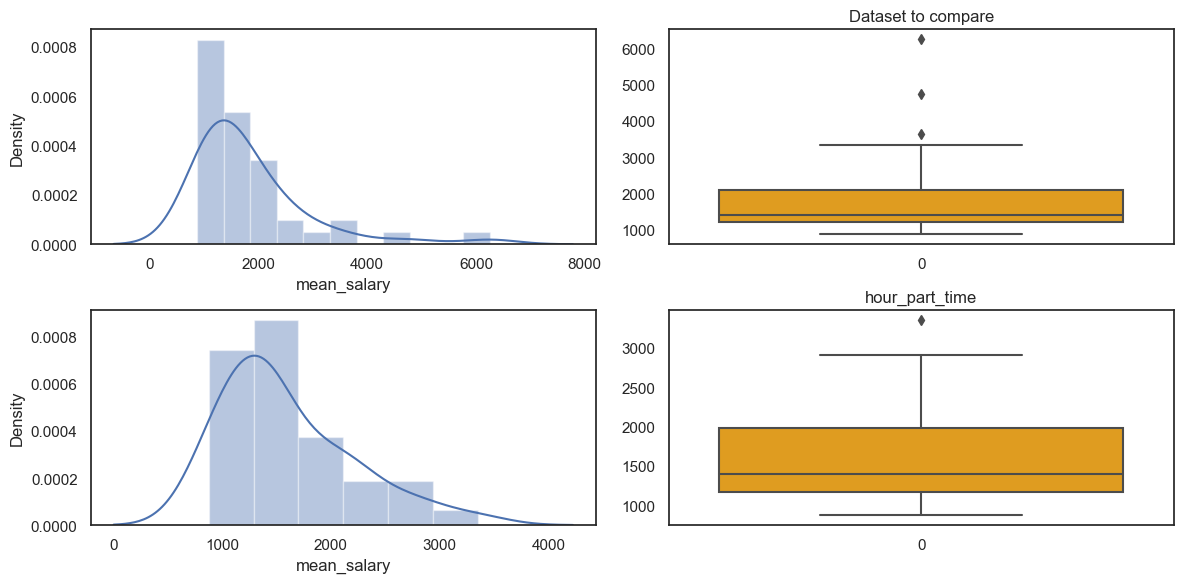

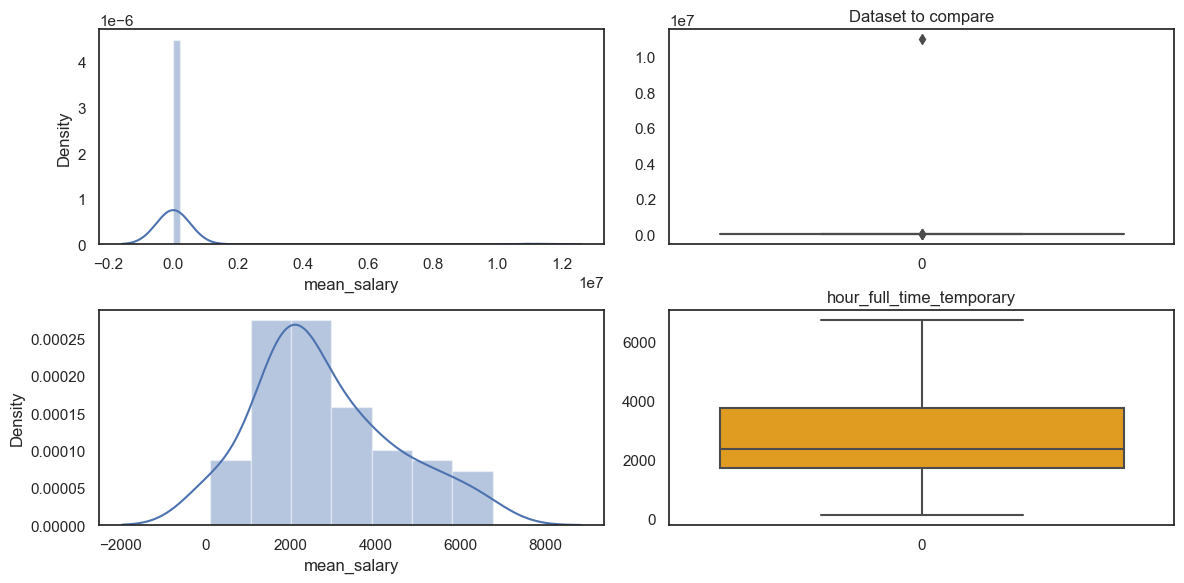

In [161]:

import warnings
warnings.filterwarnings('ignore')

def plotting (dataset_orig, dataset_new):
    plt.figure(figsize=(12,6))   
    plt.subplot(2,2,1)
    sns.distplot(dataset_orig , kde=True )
    plt.subplot(2,2,2)
    sns.boxplot(dataset_orig,color = "orange").set_title("Dataset to compare")
    plt.subplot(2,2,3)
    sns.distplot(dataset_new , kde=True )
    plt.subplot(2,2,4)
    sns.boxplot(dataset_new ,color = "orange" )
  
    
plotting(hour_full_time['mean_salary'], new_hour_full_time_low['mean_salary'])
plt.title("hour_full_time")
plt.show()
    

plotting(year_full_time['mean_salary'], new_year_full_time_low['mean_salary'])
plt.title("year_full_time")
plt.show()

plotting(year_full_time_temporary['mean_salary'], new_year_full_time_temporary_low['mean_salary'])
plt.title("year_full_time_temporary")
plt.show()

plotting(hour_part_time['mean_salary'], new_hour_part_time_low['mean_salary'])
plt.title("hour_part_time")
plt.show()

plotting(hour_full_time_temporary['mean_salary'], new_hour_full_time_temporary_low['mean_salary'])
plt.title("hour_full_time_temporary")
plt.show()

No we have the  data distribution of each "period_job"  kind of normall we proceed with the exploration

####  These are the complete types of jobs

- new_hour_full_time_low
- new_year_full_time_low
- new_year_full_time_temporary_low
- new_hour_part_time_low
- new_hour_full_time_temporary_low
- week_full_time
- hour_temporary
- hour_per_diem
- mont_full_time
- hour_part_time_temporary
- mont_part_time
- year_part_time

- skewness: Medida estadística que describe la simetría de la distribución alrededor de un promedio. Si el sesgo es igual a cero, la distribución es simétrica; si el sesgo es positivo la distribución una tendrá una cola asimétrica extendida hacia los valores positivos

- kurtosis: 
La curtosis caracteriza la elevación o el achatamiento relativo de una distribución, comparada con la distribución normal. Una curtosis positiva indica una distribución relativamente elevada, mientras que una curtosis negativa indica una distribución relativamente plana


In [162]:
print("hour_full_time Skewness: %f" % new_hour_full_time_low['mean_salary'].skew())
print("hour_full_time Kurtosis: %f" % new_hour_full_time_low['mean_salary'].kurt())

print("year_full_time Skewness: %f" % new_year_full_time_low['mean_salary'].skew())
print("year_full_time Kurtosis: %f" % new_year_full_time_low['mean_salary'].kurt())

print("year_full_time_temporary Skewness: %f" % new_year_full_time_temporary_low['mean_salary'].skew())
print("year_full_time_temporary Kurtosis: %f" % new_year_full_time_temporary_low['mean_salary'].kurt())

print("year_full_time_temporary Skewness: %f" % new_hour_part_time_low['mean_salary'].skew())
print("year_full_time_temporary Kurtosis: %f" % new_hour_part_time_low['mean_salary'].kurt())

print("year_full_time_temporary Skewness: %f" % new_hour_full_time_temporary_low['mean_salary'].skew())
print("year_full_time_temporary Kurtosis: %f" % new_hour_full_time_temporary_low['mean_salary'].kurt())

print("year_full_time_temporary Skewness: %f" % week_full_time['mean_salary'].skew())
print("year_full_time_temporary Kurtosis: %f" % week_full_time['mean_salary'].kurt())

print("hour_temporary Skewness: %f" % hour_temporary['mean_salary'].skew())
print("hour_temporary Kurtosis: %f" % hour_temporary['mean_salary'].kurt())

print("hour_per_diem Skewness: %f" % hour_per_diem['mean_salary'].skew())
print("hour_per_diem Kurtosis: %f" % hour_per_diem['mean_salary'].kurt())

print("hour_per_diem Skewness: %f" % mont_full_time['mean_salary'].skew())
print("hour_per_diem Kurtosis: %f" % mont_full_time['mean_salary'].kurt())

print("hour_part_time_temporary Skewness: %f" % hour_part_time_temporary['mean_salary'].skew())
print("hour_part_time_temporary Kurtosis: %f" % hour_part_time_temporary['mean_salary'].kurt())

print("mont_part_time Skewness: %f" % mont_part_time['mean_salary'].skew())
print("mont_part_time Kurtosis: %f" % mont_part_time['mean_salary'].kurt())

print("year_part_time Skewness: %f" % year_part_time['mean_salary'].skew())
print("year_part_time Kurtosis: %f" % year_part_time['mean_salary'].kurt())

# We find that there are nan values in skewness and kurtosis, this is because there are few data to bring an statistic result           

hour_full_time Skewness: 0.963899
hour_full_time Kurtosis: 0.590435
year_full_time Skewness: 0.144340
year_full_time Kurtosis: 0.121331
year_full_time_temporary Skewness: 0.000000
year_full_time_temporary Kurtosis: nan
year_full_time_temporary Skewness: 1.078021
year_full_time_temporary Kurtosis: 0.745250
year_full_time_temporary Skewness: 0.571434
year_full_time_temporary Kurtosis: -0.144022
year_full_time_temporary Skewness: -0.079760
year_full_time_temporary Kurtosis: -1.016206
hour_temporary Skewness: 2.449490
hour_temporary Kurtosis: 6.000000
hour_per_diem Skewness: nan
hour_per_diem Kurtosis: nan
hour_per_diem Skewness: -0.205964
hour_per_diem Kurtosis: -4.190799
hour_part_time_temporary Skewness: nan
hour_part_time_temporary Kurtosis: nan
mont_part_time Skewness: nan
mont_part_time Kurtosis: nan
year_part_time Skewness: nan
year_part_time Kurtosis: nan


Para los datos Categoricos.
- Hacer un conteo de ocurrencias por cada categoria o el porcentaje que representa la categoria de datos


In order to create this step of the process we have to concatenate and merge the datasets, so lets remember what we got so far


* a) df_data = df[df['mean_salary'] !=0]   ----> dataset that has no cero data  in column 'mean_salary'
* b) df_data_cero_ = df[df['mean_salary'] ==0]  -----> dataset that has no data in column 'mean_salary'
* d) new_xxxxxx ----> datasets woithout outliers

Steps 

- 1 concatenate datasets point d
- 2 merge dataset point a with dataset from step1
- 3 merge dataset step 2 with dataset point b

In [163]:
#Step 1
dfs = [new_hour_full_time_low
,new_year_full_time_low
,new_year_full_time_temporary_low
,new_hour_part_time_low
,new_hour_full_time_temporary_low
,week_full_time
,hour_temporary
,hour_per_diem
,mont_full_time
,hour_part_time_temporary
,mont_part_time
,year_part_time]

df_merge_no_outlier =  pd.concat(dfs,ignore_index=False)
df_merge_no_outlier.head(5)

,initial_sal_,final_sal,mean_salary,period_job
uniq_id,,,,
b43c077756d5a326c4854e1399fd2464,900.0,1300.0,1100.0,hour_full_time
3c2f7c555173e04db07a96b23c1be974,1375.0,1675.0,1525.0,hour_full_time
f884de2958f94e4ad417aefcacd350c7,1700.0,2200.0,1950.0,hour_full_time
776bd5c4c2412714ed9f1ac098470aac,1500.0,1900.0,1700.0,hour_full_time
64a597e5dd17740aadf4b0e8047b51a5,1500.0,2100.0,1800.0,hour_full_time


In [164]:
#stap2
df_merge_no_outlier_ = pd.merge(df_merge_no_outlier,df_data, on='uniq_id', how='left')
df_merge_no_outlier_ = df_merge_no_outlier_.rename(columns={'initial_sal__x': 'initial_sal_', 'final_sal_x':'final_sal', 'mean_salary_x':'mean_salary'}).drop(columns=['initial_sal__y','final_sal_y','mean_salary_y'])
df_merge_no_outlier_.head()

,initial_sal_,final_sal,mean_salary,period_job,period,period_cond,job,job_type,city,state,organization_,org_desc,sector_,sector_level,benefits
uniq_id,,,,,,,,,,,,,,,
b43c077756d5a326c4854e1399fd2464,900.0,1300.0,1100.0,hour_full_time,hour,NaN,primrose private preschool teacher,full time,houston,tx 77098,Education,NaN,Entry,Level,NaN
3c2f7c555173e04db07a96b23c1be974,1375.0,1675.0,1525.0,hour_full_time,hour,yea,local,full time,denver,co 80216,Walter,Industrial Sanitary Supply,Experienced,(Non-Manager),end bonus
f884de2958f94e4ad417aefcacd350c7,1700.0,2200.0,1950.0,hour_full_time,hour,NaN,maint mechanic,full time,willoughby hills,oh 44092,Manufacturing,Other,Experienced,(Non-Manager),NaN
776bd5c4c2412714ed9f1ac098470aac,1500.0,1900.0,1700.0,hour_full_time,hour,NaN,customer,full time,anaheim,ca,Aerospace,DefenseManufacturing Other,Administrative/Clerical,NaN,NaN
64a597e5dd17740aadf4b0e8047b51a5,1500.0,2100.0,1800.0,hour_full_time,hour,NaN,insurance sales,full time,eden prairie,mn 55344,Insurance,NaN,Accounting/Finance/Insurance,NaN,NaN


In [165]:
df_salary = pd.concat([df_data_cero,df_merge_no_outlier_])
df_salary.head()

,initial_sal_,final_sal,mean_salary,period,period_cond,job,job_type,city,state,organization_,org_desc,sector_,sector_level,benefits,period_job
uniq_id,,,,,,,,,,,,,,,
58435fcab804439efdcaa7ecca0fd783,0.0,0.0,0.0,NaN,NaN,engineer,full time,dixon,ca,Altec,Industries,Experienced,(Non-Manager),NaN,NaN
64d0272dc8496abfd9523a8df63c184c,0.0,0.0,0.0,NaN,NaN,shift supervisor,full time,camphill,pa,Retail,NaN,Project/Program,Management,NaN,NaN
1e2637cb5f7a2c4615a99a26c0566c66,0.0,0.0,0.0,NaN,NaN,construction pm,full time,charlottesville,va,Computer,IT Services,Experienced,(Non-Manager),NaN,NaN
a6a2b5e825b8ce1c3b517adb2497c5ed,0.0,0.0,0.0,NaN,NaN,housekeeper,part time,austin,tx 78746,Hotels,Lodging Personal Household Services,Customer,Support/Client Care,NaN,NaN
2f8bdf60db4d85627ab8f040e67aa78d,0.0,0.0,0.0,NaN,NaN,aflac insurance sales agent insurance sales ag...,full time,berryville,va 22611,Insurance,NaN,Customer,Support/Client Care,NaN,NaN


In [166]:
df_salary.shape

(11639, 15)

In [167]:
df_salary_ = df_salary[df_salary['mean_salary'] != 0]
df_salary_ = df_salary.dropna(subset='job')
df_salary_.isnull().sum()
# lets use again the dataset that do contains data in mean_salary

initial_sal_         0
final_sal            0
mean_salary          0
period           10141
period_cond      11304
job                  0
job_type            52
city                 0
state              792
organization_        0
org_desc          2286
sector_              0
sector_level      3363
benefits         11345
period_job       10141
dtype: int64

Lets use those columns that might help to find the value of the missing salary

In [168]:
df_salary_ = df_salary[['mean_salary' ,'job','job_type','organization_','sector_','city','period','period_job']]
df_salary_.head()

,mean_salary,job,job_type,organization_,sector_,city,period,period_job
uniq_id,,,,,,,,
58435fcab804439efdcaa7ecca0fd783,0.0,engineer,full time,Altec,Experienced,dixon,NaN,NaN
64d0272dc8496abfd9523a8df63c184c,0.0,shift supervisor,full time,Retail,Project/Program,camphill,NaN,NaN
1e2637cb5f7a2c4615a99a26c0566c66,0.0,construction pm,full time,Computer,Experienced,charlottesville,NaN,NaN
a6a2b5e825b8ce1c3b517adb2497c5ed,0.0,housekeeper,part time,Hotels,Customer,austin,NaN,NaN
2f8bdf60db4d85627ab8f040e67aa78d,0.0,aflac insurance sales agent insurance sales ag...,full time,Insurance,Customer,berryville,NaN,NaN


# Data Imputation

- 1. Fill the empty spaces with NaN to be able to manage them
- 2. Sort data for mean_salary
- 3. Delete missing rows with misssing data in the column job
    - 3.1 Create a dataset that don't contain rows with no job repetition
- 4. Create a Function that helps identify similar job to put the same mean_salary


In [169]:
df_salary_ = df_salary_.apply(lambda x: x.astype(str).str.lower())
df_salary_['job'] = df_salary_['job'].map(lambda x : str(x).strip())
df_salary_['organization_'] = df_salary_['organization_'].map(lambda x : str(x).strip())
df_salary_['sector_'] = df_salary_['sector_'].map(lambda x : str(x).strip())
df_salary_['mean_salary'] =df_salary_['mean_salary'].astype(float)

df_salary_.head(5)

,mean_salary,job,job_type,organization_,sector_,city,period,period_job
uniq_id,,,,,,,,
58435fcab804439efdcaa7ecca0fd783,0.0,engineer,full time,altec,experienced,dixon,nan,nan
64d0272dc8496abfd9523a8df63c184c,0.0,shift supervisor,full time,retail,project/program,camphill,nan,nan
1e2637cb5f7a2c4615a99a26c0566c66,0.0,construction pm,full time,computer,experienced,charlottesville,nan,nan
a6a2b5e825b8ce1c3b517adb2497c5ed,0.0,housekeeper,part time,hotels,customer,austin,nan,nan
2f8bdf60db4d85627ab8f040e67aa78d,0.0,aflac insurance sales agent insurance sales agent,full time,insurance,customer,berryville,nan,nan


In [170]:
# First step
df_salary_['job'] = df_salary_['job'].replace(' ', np.NaN).to_frame()
df_salary_


,mean_salary,job,job_type,organization_,sector_,city,period,period_job
uniq_id,,,,,,,,
58435fcab804439efdcaa7ecca0fd783,0.0,engineer,full time,altec,experienced,dixon,nan,nan
64d0272dc8496abfd9523a8df63c184c,0.0,shift supervisor,full time,retail,project/program,camphill,nan,nan
1e2637cb5f7a2c4615a99a26c0566c66,0.0,construction pm,full time,computer,experienced,charlottesville,nan,nan
a6a2b5e825b8ce1c3b517adb2497c5ed,0.0,housekeeper,part time,hotels,customer,austin,nan,nan
2f8bdf60db4d85627ab8f040e67aa78d,0.0,aflac insurance sales agent insurance sales agent,full time,insurance,customer,berryville,nan,nan
...,...,...,...,...,...,...,...,...
bbfea4764b5da08f213fffb540365ede,551250.0,continuous improvement agent,full time,government,experienced,dallas,mont,mont_full_time
5eaae0af06f434b723386a15c9e2d7a9,1250.0,accounts payable,part time temporary,accounting,experienced,cincinnati 45237,hour,hour_part_time_temporary
4a287bddd05b2acbf65f4c01da6260eb,800000.0,sr systems engineer,part time,computer,experienced,dallas,mont,mont_part_time


In [171]:
# Second and third Step
df_salary_sort = df_salary_.dropna(subset='job').sort_values(by=['job'])
df_salary_sort.head(5)

,mean_salary,job,job_type,organization_,sector_,city,period,period_job
uniq_id,,,,,,,,
10751587422feb1a368621b24013950f,0.0,,full time,all,experienced,parkersburg,nan,nan
ebca9e4afab76f7dd8f64b04ed26ca1a,0.0,a,full time,accounting,accounting/finance/insurance,irving,nan,nan
6d022557de8dbbbbe9fcaba22923f4a5,0.0,a,full time temporary,aerospace,installation/maintenance/repair,marana,nan,nan
7ed067b445dcc5dd39ce61dda0cc7bc6,6750000.0,a,full time,telecommunications,manager,dallas,year,year_full_time
cf4e1245bc2fe2e18b6573058533f798,0.0,a golden corral restaurant co-worker,full time,hotels,food,pensacola,nan,nan


In [172]:
# Data with count of jobs repeated more that once
job_counts = df_salary_sort['job'].value_counts().to_frame().reset_index(drop=False)
job_counts


,index,job
0,shift supervisor,331
1,registered nurse,219
2,pm,142
3,restaurant mgr,127
4,director,119
...,...,...
5027,global analytics lead,1
5028,global client services product mgr,1
5029,global director,1
5030,global hr compliance specialist,1


In [173]:
job_counts_dup = job_counts[job_counts['job']>1]
job_counts_dup


,index,job
0,shift supervisor,331
1,registered nurse,219
2,pm,142
3,restaurant mgr,127
4,director,119
...,...,...
1307,contract corporate paralegal,2
1308,commercial drywall estimator,2
1309,pharmacy intern,2
1310,payroll processor,2


In [174]:
list_jobs = list(job_counts_dup['index'])
list_jobs
#tupla_jobs = list(zip(just_jobs,just_jobs.index))
#tupla_jobs


['shift supervisor',
 'registered nurse',
 'pm',
 'restaurant mgr',
 'director',
 'rn',
 'event specialist',
 'sales rep',
 'administrative assistant',
 'physical therapist',
 'customer service rep',
 'maint tech',
 'cook',
 'human resources',
 'aflac insurance sales agent insurance sales agent',
 'quality engineer',
 'lead sales associate',
 'mgr',
 'paralegal',
 'nan',
 'residential lawn specialist',
 'truck driver',
 'receptionist',
 'sales associate',
 'project coordinator',
 'asst store mgr',
 'marketing',
 'general laborerser',
 'general mgr',
 'class a cdl driver',
 'legal secretary',
 'aflac insurance sales agent',
 'driver',
 'sales',
 'experienced cdl-a driver',
 'personal banker',
 'field tech',
 'business analyst',
 'production supervisor',
 'legal assistant',
 'account mgr',
 'certified nurses assistant',
 'pest control tech',
 'customer service',
 'assistant mgr',
 'quality assurance mgr',
 'restaurant general mgr',
 'entry level insurance sales',
 'quality mgr',
 'cashie

In [175]:
# 3.1 datas#et with column that indicates if job is more that once
df_salary_sort['job_duplicated'] =df_salary_sort['job'].map(lambda x: 'yes' if x in list_jobs else 'no')
df_salary_sort.head(5)


,mean_salary,job,job_type,organization_,sector_,city,period,period_job,job_duplicated
uniq_id,,,,,,,,,
10751587422feb1a368621b24013950f,0.0,,full time,all,experienced,parkersburg,nan,nan,no
ebca9e4afab76f7dd8f64b04ed26ca1a,0.0,a,full time,accounting,accounting/finance/insurance,irving,nan,nan,yes
6d022557de8dbbbbe9fcaba22923f4a5,0.0,a,full time temporary,aerospace,installation/maintenance/repair,marana,nan,nan,yes
7ed067b445dcc5dd39ce61dda0cc7bc6,6750000.0,a,full time,telecommunications,manager,dallas,year,year_full_time,yes
cf4e1245bc2fe2e18b6573058533f798,0.0,a golden corral restaurant co-worker,full time,hotels,food,pensacola,nan,nan,yes


In [176]:
jobs_duplicated = df_salary_sort[df_salary_sort['job_duplicated']== 'yes']
jobs_not_duplicated = df_salary_sort[df_salary_sort['job_duplicated']== 'no']
# We create two datasets

# Imputation with KNN

In order to create an imputation of 'mean_salary' column lets proceed selecting just the columns we cosider useful for the porpuse

In [177]:
impu_salary= jobs_duplicated[['mean_salary', 'job','sector_','period','job_duplicated','job_type']].sort_values(by=['job','sector_'])
impu_salary = impu_salary.reset_index(drop=False)
impu_salary['periodo_init'] =np.nan
impu_salary['mean_salary'].replace(0, np.nan, inplace=True)

impu_salary.head(5)

,uniq_id,mean_salary,job,sector_,period,job_duplicated,job_type,periodo_init
0,ebca9e4afab76f7dd8f64b04ed26ca1a,NaN,a,accounting/finance/insurance,nan,yes,full time,NaN
1,6d022557de8dbbbbe9fcaba22923f4a5,NaN,a,installation/maintenance/repair,nan,yes,full time temporary,NaN
2,7ed067b445dcc5dd39ce61dda0cc7bc6,6750000.0,a,manager,year,yes,full time,NaN
3,cf4e1245bc2fe2e18b6573058533f798,NaN,a golden corral restaurant co-worker,food,nan,yes,full time,NaN
4,887d0b47f9a02af63ae21ad9df6d518d,NaN,a golden corral restaurant co-worker,food,nan,yes,full time,NaN


The column 'period' migth be really usefull, nevertheless it has incomplet information, however we can create a loop eto complete the data comparing variables

In [178]:
for index, row in impu_salary.iterrows():
    if index == 0:
        impu_salary['periodo_init'].loc[index] = impu_salary['period'].loc[index]
    elif index > 0 and impu_salary['sector_'].loc[index-1] ==row[3]:
        impu_salary['periodo_init'].loc[index] = impu_salary['periodo_init'].loc[index-1]
    else:
        impu_salary['periodo_init'].loc[index] = impu_salary['period'].loc[index]
impu_salary.head(5)

        

,uniq_id,mean_salary,job,sector_,period,job_duplicated,job_type,periodo_init
0,ebca9e4afab76f7dd8f64b04ed26ca1a,NaN,a,accounting/finance/insurance,nan,yes,full time,nan
1,6d022557de8dbbbbe9fcaba22923f4a5,NaN,a,installation/maintenance/repair,nan,yes,full time temporary,nan
2,7ed067b445dcc5dd39ce61dda0cc7bc6,6750000.0,a,manager,year,yes,full time,year
3,cf4e1245bc2fe2e18b6573058533f798,NaN,a golden corral restaurant co-worker,food,nan,yes,full time,nan
4,887d0b47f9a02af63ae21ad9df6d518d,NaN,a golden corral restaurant co-worker,food,nan,yes,full time,nan


Here I'm gonna use KNNimputer to complete the missing information of 'mean_salary' variable

In [179]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors = 2, weights="distance",metric = "nan_euclidean")
impu_salary['mean_salary'] = imputer.fit_transform(impu_salary[['mean_salary']])
impu_salary


,uniq_id,mean_salary,job,sector_,period,job_duplicated,job_type,periodo_init
0,ebca9e4afab76f7dd8f64b04ed26ca1a,3.908249e+06,a,accounting/finance/insurance,nan,yes,full time,nan
1,6d022557de8dbbbbe9fcaba22923f4a5,3.908249e+06,a,installation/maintenance/repair,nan,yes,full time temporary,nan
2,7ed067b445dcc5dd39ce61dda0cc7bc6,6.750000e+06,a,manager,year,yes,full time,year
3,cf4e1245bc2fe2e18b6573058533f798,3.908249e+06,a golden corral restaurant co-worker,food,nan,yes,full time,nan
4,887d0b47f9a02af63ae21ad9df6d518d,3.908249e+06,a golden corral restaurant co-worker,food,nan,yes,full time,nan
...,...,...,...,...,...,...,...,...
7914,7233e7c7152b4e076f55a13485061100,3.908249e+06,window,entry,nan,yes,full time,nan
7915,826a39eaaecb3c0616a50ffa4c634e52,3.908249e+06,windows system admin,experienced,nan,yes,full time,nan
7916,17523d39d62ff215bc73911996cdc833,3.908249e+06,windows system admin,it/software,nan,yes,full time temporary,nan
7917,ccf873204222fe54423c2ff78e2ad5f3,3.908249e+06,workers compensation,experienced,nan,yes,full time,nan


In [180]:
df_impu_salary = impu_salary.set_index('uniq_id')
df_impu_salary.head(5)

,mean_salary,job,sector_,period,job_duplicated,job_type,periodo_init
uniq_id,,,,,,,
ebca9e4afab76f7dd8f64b04ed26ca1a,3.908249e+06,a,accounting/finance/insurance,nan,yes,full time,nan
6d022557de8dbbbbe9fcaba22923f4a5,3.908249e+06,a,installation/maintenance/repair,nan,yes,full time temporary,nan
7ed067b445dcc5dd39ce61dda0cc7bc6,6.750000e+06,a,manager,year,yes,full time,year
cf4e1245bc2fe2e18b6573058533f798,3.908249e+06,a golden corral restaurant co-worker,food,nan,yes,full time,nan
887d0b47f9a02af63ae21ad9df6d518d,3.908249e+06,a golden corral restaurant co-worker,food,nan,yes,full time,nan


In [181]:
df_impu_salary_ = df_impu_salary.join(jobs_not_duplicated,lsuffix='l_',rsuffix='r_', how = 'left')
df_impu_salary_ = df_impu_salary_.drop(columns=['jobr_','mean_salaryr_','sector_r_','periodr_','job_duplicatedr_','job_typer_'])
df_impu_salary_

,mean_salaryl_,jobl_,sector_l_,periodl_,job_duplicatedl_,job_typel_,periodo_init,organization_,city,period_job
uniq_id,,,,,,,,,,
ebca9e4afab76f7dd8f64b04ed26ca1a,3.908249e+06,a,accounting/finance/insurance,nan,yes,full time,nan,NaN,NaN,NaN
6d022557de8dbbbbe9fcaba22923f4a5,3.908249e+06,a,installation/maintenance/repair,nan,yes,full time temporary,nan,NaN,NaN,NaN
7ed067b445dcc5dd39ce61dda0cc7bc6,6.750000e+06,a,manager,year,yes,full time,year,NaN,NaN,NaN
cf4e1245bc2fe2e18b6573058533f798,3.908249e+06,a golden corral restaurant co-worker,food,nan,yes,full time,nan,NaN,NaN,NaN
887d0b47f9a02af63ae21ad9df6d518d,3.908249e+06,a golden corral restaurant co-worker,food,nan,yes,full time,nan,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
7233e7c7152b4e076f55a13485061100,3.908249e+06,window,entry,nan,yes,full time,nan,NaN,NaN,NaN
826a39eaaecb3c0616a50ffa4c634e52,3.908249e+06,windows system admin,experienced,nan,yes,full time,nan,NaN,NaN,NaN
17523d39d62ff215bc73911996cdc833,3.908249e+06,windows system admin,it/software,nan,yes,full time temporary,nan,NaN,NaN,NaN


No that we have impute the 'mean_salary' column lets try our dataset with some graphs, of course feel free to probe as many variables as you want

In [182]:
sample = df_impu_salary_[df_impu_salary_['periodo_init'] != 'nan']
sample_ = sample[df_impu_salary_['sector_l_'].str.startswith('eng')]
sample_.head(5)

,mean_salaryl_,jobl_,sector_l_,periodl_,job_duplicatedl_,job_typel_,periodo_init,organization_,city,period_job
uniq_id,,,,,,,,,,
d21f161b1db206355f8057d5f66ad3a8,7000000.0,commercial construction estimator,engineering,year,yes,full time,year,NaN,NaN,NaN
18126d1a3b0a860bfbe8388be68d7de5,3100.0,contract drafter,engineering,hour,yes,full time,hour,NaN,NaN,NaN
13f36c10dac5aad99fc3cb0c48e2b454,3100.0,contract drafter,engineering,hour,yes,full time,hour,NaN,NaN,NaN
eb327d51bbcd9fcfe31d7e2b2c1bcd78,5100000.0,design engineer,engineering,year,yes,full time,year,NaN,NaN,NaN
3122c064405b2637d43b684003b2814e,6000000.0,industrial,engineering,year,yes,full time,year,NaN,NaN,NaN


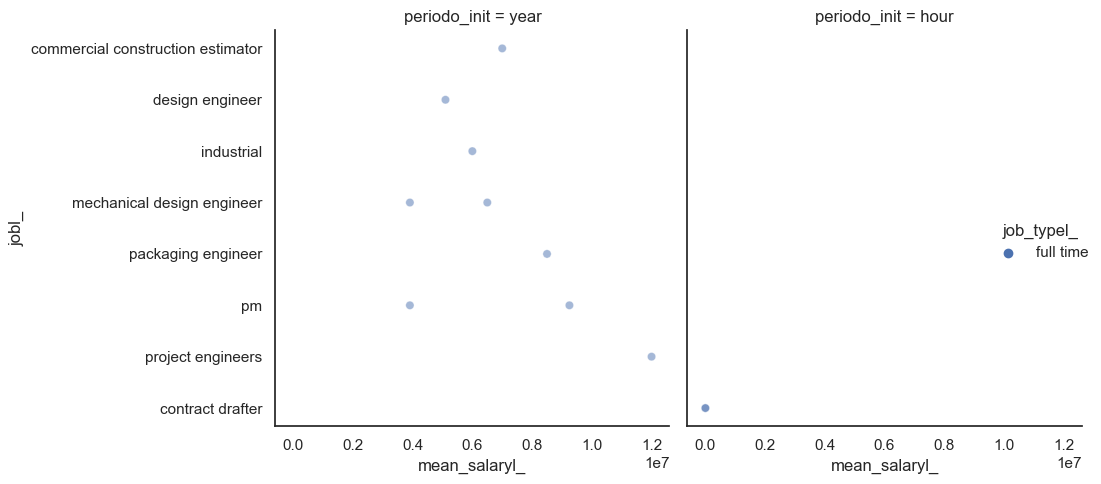

In [183]:
import seaborn as sns
sns.set_theme(style="white")

sns.relplot(x="mean_salaryl_", y="jobl_", hue="job_typel_",
            sizes=(10, 100), alpha=.5, col="periodo_init", data=sample_)

# Sumarization

Explore data is a really extensive task it tookme several days to get to this result, even the data was cleanes from prevous excersice whe you want to find a specifict graph sometimes it's necesary to clean a little bit more or just segregate de data that allows you fulfill your goal.

It is necesario to implement functions and loops to create automatic task 

At the end we can see in the graph that I manage to impute numeric data and thats why we can have a plot that let us have an idea of the mean salaryes for specificts jobs, this excersice can be approached with ML if you are in that area.

Hope you like it, for me was practice and a repository to come an remmember code.
happy life.
